# **Overview**

Throughout this assignment, you will be performing specific well-defined tasks that’ll strengthen your concepts in Unsupervised Learning. We will be using the facebook live sellers dataset for Task 1 & 2 of the assignment and here is a brief context about the same - The data is about live selling feature on the Facebook platform. Each record consists of information about the time live information of sale is posted to Facebook and engagements in the data. The engagements are regular Facebook interactions such as share and emotion rection.

As part of the assignment, you will have to accomplish the below tasks.


**Author:** Chintoo Kumar

# **Dataset**

Dataset Link: https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

**About the dataset:**

The Facebook Live Sellers in Thailand is a dataset curated in UCI Machine Learning Datasets. It data contains 7050 observations and twelve attributes. In this assignment, the preprocessed dataset contains 7050 instances and 10 attributes. The details of the attributes are as follows:

* status_type: The type of shared status
* num_reactions: Number of glimpses over a shared status by viewers
* num_comments: Number of comments on that particular shared status
* num_shares: Toal number of shares by peers
* num_likes: Number of likes on the post
* num_loves: Number of love emojis of that shared post
* num_wows: Number of wow emojis on that post
* num_hahas: Number of haha emojis on that post
* num_sads: Number of sad emojis on that post
* num_angrys: Number of angry emojis on that post

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **Task 1: Data loading and Data Analysis**

* Load the data file into a dataframe object : df
* Display the first 5 observation of the dataset
* Display a concise summary of the provided data and list out 2 observations/inferences that you observe from the result. You can use the info() method for this.
* Perform EDA viz. Is there any missing values in each column of the provided dataset
* Display all the unique status_type of the dataframe
* Convert categorical variable, i.e., status_type into numerical representation using a label encoder

## Load the data file into a dataframe object : df

In [28]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv")

## Display the first 5 observation of the dataset

In [29]:
df.head(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


## Display a concise summary of the provided data and list out 2 observations/inferences that you observe from the result. You can use the info() method for this.

* Averagely the least shared emoji type is "angry emojis".
* Photos are the most frequently shared items in Facebook.

In [30]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
status_id,7050.0,NaN,NaN,NaN,3525.5,2035.304031,1.0,1763.25,3525.5,5287.75,7050.0
status_type,7050,4,photo,4288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status_published,7050,6913,3/20/2018 1:54,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_reactions,7050.0,NaN,NaN,NaN,230.117163,462.625309,0.0,17.0,59.5,219.0,4710.0
num_comments,7050.0,NaN,NaN,NaN,224.356028,889.63682,0.0,0.0,4.0,23.0,20990.0
num_shares,7050.0,NaN,NaN,NaN,40.022553,131.599965,0.0,0.0,0.0,4.0,3424.0
num_likes,7050.0,NaN,NaN,NaN,215.043121,449.472357,0.0,17.0,58.0,184.75,4710.0
num_loves,7050.0,NaN,NaN,NaN,12.728652,39.97293,0.0,0.0,0.0,3.0,657.0
num_wows,7050.0,NaN,NaN,NaN,1.289362,8.71965,0.0,0.0,0.0,0.0,278.0
num_hahas,7050.0,NaN,NaN,NaN,0.696454,3.957183,0.0,0.0,0.0,0.0,157.0


## Perform EDA viz. Is there any missing values in each column of the provided dataset

* There is no any observation in Column1, Column2, Column3 and Column4.
* Other variables don't have any missing value.
* Please check the graph below to see missing values in the variables.

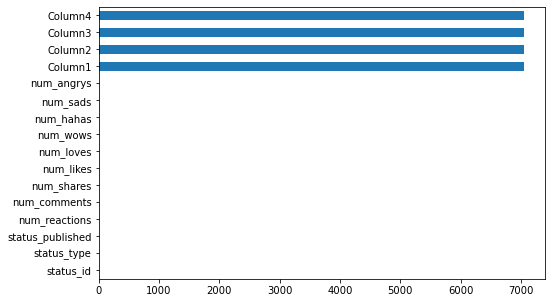

In [31]:
plt.subplots(figsize=(8,5))
df.isna().sum().plot.barh();

## Display all the unique status_type of the dataframe

In [32]:
df.status_type.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [33]:
df.status_type.value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

## Convert categorical variable, i.e., status_type into numerical representation using a label encoder

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["status_type"] = le.fit_transform(df["status_type"])

In [35]:
df.head(2)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4,status_type_n
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN,3
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN,1


# **Task 2: Feature Scaling**


*   Perform normalization to scale numerical data prior to modeling. You may use Min-max scaling technique
*   Use Elbow method to determine the number of cluster to be formed
*   Verify optimal number of clusers on the basis of silhouette scores
*   Assigning cluster label to each instance of the dataframe
*   Validating obtained clusters using external cluster validation approaches like rand_score and adjusted_rand_score


In [36]:
# Let's first drop the features that we don't like to use in our model.

df.drop(["Column1","Column2","Column3","Column4","status_published","status_id"], axis=1, inplace=True)

## Perform normalization to scale numerical data prior to modeling. You may use Min-max scaling technique

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(df.drop("status_type", axis=1))
# status_type is excluded to be used on external validation in next steps.

In [38]:
X

array([[0.11231423, 0.02439257, 0.07651869, ..., 0.00636943, 0.01960784,
        0.        ],
       [0.03184713, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04819533, 0.01124345, 0.0166472 , ..., 0.00636943, 0.        ,
        0.        ],
       ...,
       [0.00042463, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07452229, 0.0005717 , 0.00642523, ..., 0.        , 0.        ,
        0.        ],
       [0.00360934, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Use Elbow method to determine the number of cluster to be formed

* According to the elbow method, **k=2** might be the optimum cluster number but it's still a little bit ambiguous with the elbow method. It would surely be better to clarify the optimum cluster number with another evaluation method such as Silhouette Score. 

In [39]:
from sklearn.cluster import KMeans

In [40]:
# For loop to perform elbow method
sse = []
k_rng = range(1,11)
for k in k_rng:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X)
    sse.append(km.inertia_)

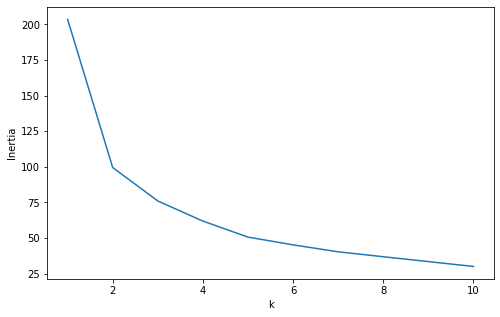

In [41]:
plt.subplots(figsize=(8,5))
plt.xlabel('k')
plt.ylabel('Inertia')
plt.plot(k_rng,sse);

## Verify optimal number of clusers on the basis of silhouette scores

* Although elbow method indicates that k=2 is the optimum option, **k=3** has the highest Silhouette score. (please check the graph below)

* After these analyses we decide to choose **3** as number of clusters.

In [42]:
from sklearn.metrics import silhouette_score

slht = []
k_rng = range(2,10)

for k in k_rng:
    km = KMeans(n_clusters = k, random_state=2).fit(X)
    slht.append(silhouette_score(X, km.labels_))

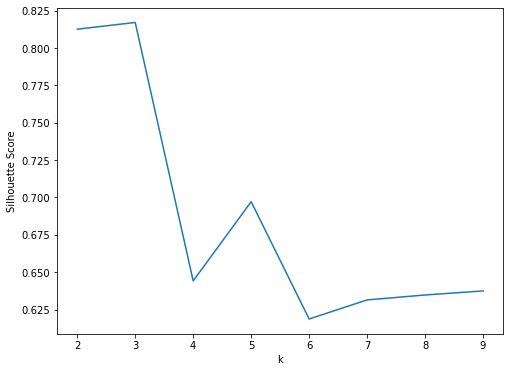

In [43]:
plt.subplots(figsize=(8,6))
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.plot(k_rng,slht);

## Assigning cluster label to each instance of the dataframe

In [59]:
km = KMeans(n_clusters=2, random_state=2)
df["cluster"] = km.fit_predict(X)

## Validating obtained clusters using external cluster validation approaches like rand_score and adjusted_rand_score

* It seems our clustering model didn't work that well. According to the rand_score and adjusted_rand_score, our model predicted the clusters randomly. Using a different clustering algorithm or following a different preprocessing track might improve our clustering model.

In [60]:
from sklearn import metrics

In [61]:
metrics.rand_score(df["status_type"], df["cluster"])

0.5080647825907603

In [62]:
metrics.adjusted_rand_score(df["status_type"], df["cluster"])

0.04102828446382808

# **Task 3: Perform PCA on Fruit Dataset**

Fruit Dataset Link: https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv

* Use PCA to find the first two principal components of the fruit dataset
* Scale the value. Each feature should be centered (zero mean) and with unit variance
* Analysis - perform PCA with 4 components and print their explained variance_ratio



In [65]:
df = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv")
df.head(5)

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79


## Use PCA to find the first two principal components of the fruit datase

In [68]:
from sklearn.decomposition import PCA

In [71]:
pca = PCA(n_components=2)
pca.fit_transform(df)

In [72]:
pca.components_

array([[ 7.21640491e-04,  9.99801105e-01,  1.30294190e-02,
         1.50814711e-02, -1.11556357e-04],
       [ 7.62665550e-01, -7.77757544e-03, -1.68186136e-01,
         6.24292671e-01, -1.59013577e-02]])

## Scale the value. Each feature should be centered (zero mean) and with unit variance

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

## Analysis - perform PCA with 4 components and print their explained variance_ratio

In [76]:
pca = PCA(n_components=4)
pca.fit_transform(X_scaled)

array([[ 1.39797860e+00, -5.70202830e-01,  3.17098906e+00,
        -1.47882225e-01],
       [ 6.98441719e-01, -6.60323027e-01,  2.76324344e+00,
        -1.74197091e-02],
       [ 3.86423418e-01, -3.03174277e-01,  2.44338252e+00,
        -3.72376153e-01],
       [-2.79685107e+00, -4.57200636e-01,  3.39153917e-01,
         6.78807342e-01],
       [-2.96508498e+00, -3.13239549e-01,  4.39177663e-01,
         6.75017959e-01],
       [-3.20805666e+00, -1.50593088e-01,  7.02226077e-01,
         7.60167144e-01],
       [-3.24574765e+00, -4.28538502e-01,  2.63601234e-01,
         8.00589850e-01],
       [-3.47439215e+00, -4.30484674e-01,  3.17448888e-01,
         9.15608388e-01],
       [-3.87378247e-01, -1.83392416e+00, -1.42660251e+00,
        -5.72069556e-01],
       [-4.90944668e-01, -1.97717961e+00, -8.31749988e-01,
        -1.39113948e-01],
       [-8.76197157e-01, -1.85649490e+00, -1.44976536e+00,
        -4.18805069e-01],
       [-5.32840512e-01, -1.85671318e+00, -1.37188173e+00,
      

In [77]:
pca.explained_variance_ratio_

array([0.46714596, 0.31485849, 0.16064024, 0.04624694])